In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [12]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC



In [13]:
iris = datasets.load_iris()
X=iris["data"][:,(2,3)]
y=(iris["target"]==2).astype(np.float64)

svm_clf = Pipeline((
                    ("scaler",StandardScaler()),
                    ("linear_svc",LinearSVC(C=1,loss="hinge")),
    ))

svm_clf.fit(X,y)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))))

In [14]:
svm_clf.predict([[5.5,1.7]])

array([1.])

# Non_linear Classification

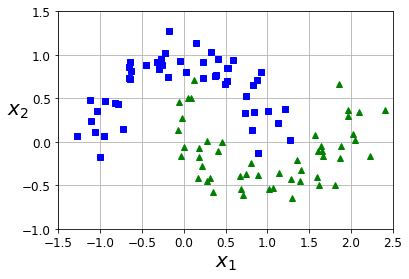

In [15]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100,noise=0.15,random_state=42)

def plot_dataset(X,y,axes):
        plt.plot(X[:,0][y==0],X[:,1][y==0],"bs")
        plt.plot(X[:,0][y==1],X[:,1][y==1],"g^")
        plt.axis(axes)
        plt.grid(True,which='both')
        plt.xlabel(r"$x_1$",fontsize=20)
        plt.ylabel(r"$x_2$",fontsize=20,rotation=0)
        

plot_dataset (X,y,[-1.5,2.5,-1,1.5])
plt.show()

In [16]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features",PolynomialFeatures(degree=3)),
        ("scaler",StandardScaler()),
        ("svm_clf",LinearSVC(C=10,loss='hinge',random_state=42))
    ])


polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

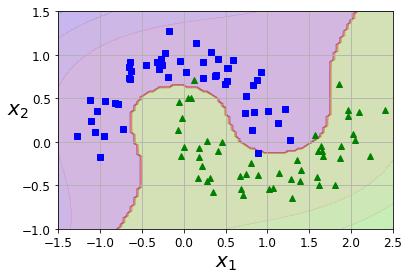

In [21]:
def plot_predictions(clf,axes):
    x0s = np.linspace(axes[0],axes[1],100)
    x1s = np.linspace(axes[2],axes[3],100)
    x0,x1 = np.meshgrid(x0s,x1s)
    X=np.c_[x0.ravel(),x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0,x1,y_pred,cmap=plt.cm.brg,alpha=0.2)
    plt.contourf(x0,x1,y_decision,cmap=plt.cm.brg,alpha=0.1)
    
plot_predictions(polynomial_svm_clf , [-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])

plt.show()

In [23]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline((
        ("scaler",StandardScaler()),
        ("svm_clf",SVC(kernel="poly",degree=3,coef0=1, C=5))
    ))

poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))))

In [24]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler",StandardScaler()),
        ("svm_clf",SVC(kernel="poly",degree=10,coef0=100,C=5))
        ])

poly100_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=100,
  decision_function_shape=None, degree=10, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

IndexError: list index out of range

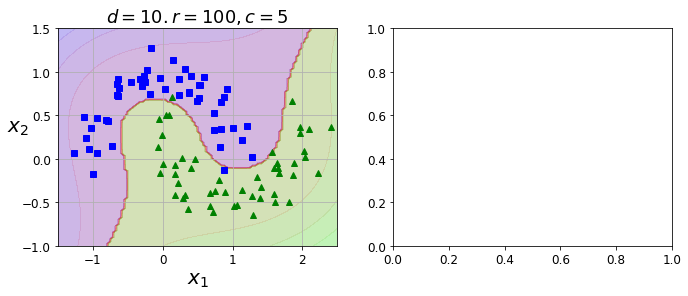

In [31]:
plt.figure(figsize=(11,4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])
plt.title(r"$d=10.r=100,c=5$",fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf , [-1.5 , 2.5 -1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])
plt.title(r"$d=10,r=100,c=5$",fontsize=18)


plt.show()

IndexError: list index out of range

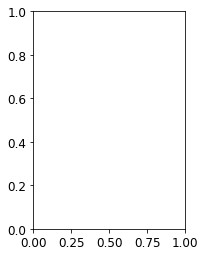

In [35]:
rbf_kernel_svm_clf = Pipeline((
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="rbf",gamma=5,C=0.001))
    ))

rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))))

# SVM Regression

In [36]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X,y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [37]:
np.random.seed(42)
m=100
X=2*np.random.rand(m,1)-1
y=(0.2+0.1*X+0.5*X**2 + np.random.randn(m,1)/10).ravel()

In [39]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly",degree=2,C=100,epsilon=0.1)
svm_poly_reg2  = SVR(kernel="poly",degree=2,C=0.01 , epsilon=0.1)
svm_poly_reg1.fit(X,y)
svm_poly_reg2.fit(X,y)


SVR(C=0.01, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
plt.figure(figsize=(9,4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1 , X,y,[-1,1,0,1])
plt.title(r"$degree={},C={},\epsilon={}$".format(svm_poly_reg1.degree,svm_poly_reg1.C,svm_poly_reg1.epsilon,rotation=0)
          
          